In [387]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [641]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year

p1_lat, p1_lon = 39.835694, -105.359097
# p2_lat, p2_lon = 39.855119, -105.297783
p2_lat, p2_lon = 38.821557, -104.660183
p3_lat, p3_lon = 39.655210, -105.402332
p4_lat, p4_lon = 39.965930, -105.440591

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [389]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,148698,-,-,-,39.97,-105.46,-7,2529,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [390]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p1_lat, lon=p1_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
# df.set_index()
# take a look
print('shape:', df.shape)
df.head(8)
# print(df.iloc[2,:])

shape: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-9,145.08,-15,53.54,0.866,750,0.516,3.8,270.0,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-9,139.51,-14,57.22,0.866,750,0.523,3.8,270.0,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-9,133.81,-14,57.23,0.866,750,0.527,3.7,270.0,0,0,0


In [391]:
# df.insert(3, 'MonthDay', df['Month']*100+df['Day']*10+df['Minute'])
dff = df.drop(columns=['Year'], axis=1)

dff.head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0


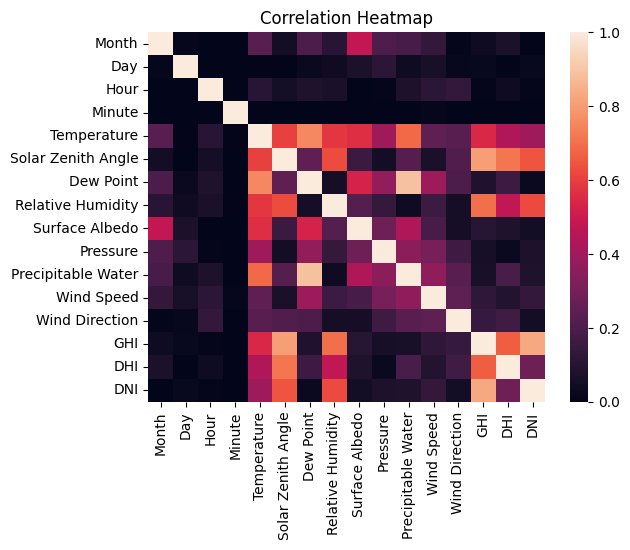

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = abs(dff.corr())
heatmap = sns.heatmap(abs(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()

In [393]:
df['DNI after 0.5h'] = df[['DNI']].shift(1)
df['DNI after 1.0h'] = df[['DNI']].shift(2)
df['DNI after 1.5h'] = df[['DNI']].shift(3)
df['DNI after 2.0h'] = df[['DNI']].shift(4)
df['DNI after 2.5h'] = df[['DNI']].shift(5)
df['DNI after 3.0h'] = df[['DNI']].shift(6)
df['DNI after 3.5h'] = df[['DNI']].shift(7)
df['DNI after 4.0h'] = df[['DNI']].shift(8)
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [394]:
sub_df = df.iloc[:, 5:]
sub_df.head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


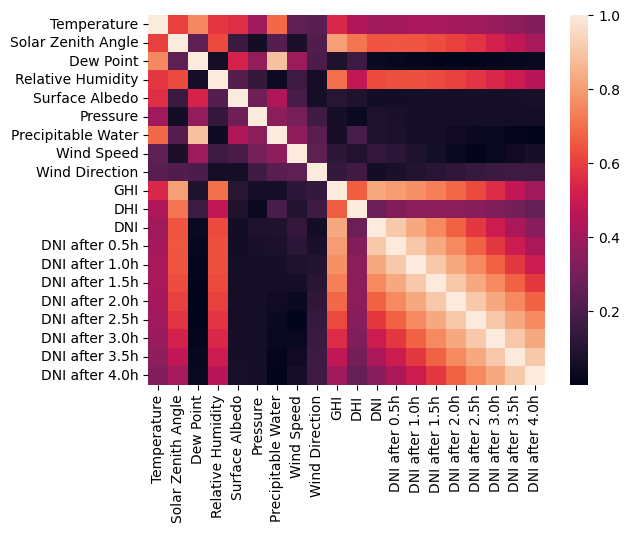

In [395]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [396]:
sub_df.drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)
sub_df.head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,59.53,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,55.02,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,55.62,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,55.63,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,57.88,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


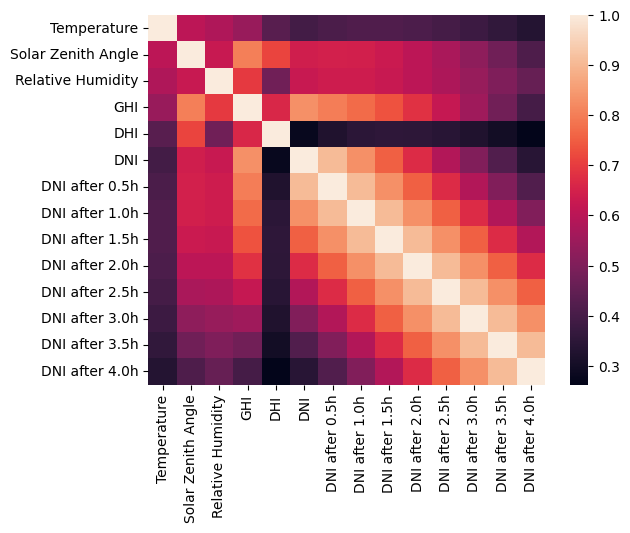

In [397]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [398]:
win_size = 8
df_fetures = sub_df.iloc[:,:-8]

X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
Y = np.zeros((df_fetures.shape[0] - win_size, 1))

print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))

for i in range(X.shape[0]):
    chunk_x = df_fetures.iloc[i:i+win_size, :].to_numpy()
    chunk_y = df_fetures.iloc[i+win_size, -1]
    X[i] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
    Y[i]= chunk_y
    # if i == 12:
    #     print("X = ", X[i])
    #     print("Y = ", Y[i])

Feature array size:(17512, 48), Labels array size(17512, 1)


In [399]:
# Remove the labels that we are sure they have DNI of 0
zero_index = []
for i in range(31, 50):
    ## 31 means 7pm, and 50 means 5:30 am
    zero_index = zero_index + list(range(i, Y.shape[0], 48))
# zero1 = list(range(34, Y.shape[0], 48))    #10pm
# zero2 = list(range(35, Y.shape[0], 48))    #11pm
print(len(zero_index))
print(np.sum(np.take(Y, zero_index)))

Y = np.delete(Y, zero_index, axis=0)
X = np.delete(X, zero_index, axis=0)

print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))


6925
0.0
Feature array size:(10587, 48), Labels array size(10587, 1)


In [400]:
####################### This cell is for prediction not forcasting ############################
# X = dff.iloc[:, :-1]
# Y = dff.iloc[:, -1]
# print("Features array size: ", X.shape)
# print("Labels array size: ", Y.shape)

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
# validation_ratio = 0.15
test_ratio = 0.30

trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)


# valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc=StandardScaler()
scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

print("trainx size: ", trainX_scaled.shape)
print("testx size: ", testX_scaled.shape)
print("==============")
print("trainy size: ", trainY.shape)
print("testy size: ", testY.shape)


trainx size:  (7410, 48)
testx size:  (3177, 48)
trainy size:  (7410, 1)
testy size:  (3177, 1)


In [402]:
# let's try linear regression first
from sklearn import linear_model, metrics


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX_scaled, trainY)

# Make predictions using the testing set
y_pred_linreg = regr.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))


Mean Absolute Error: 121.09410653734832
Mean Squared Error: 30894.657464090058
Root Mean Squared Error: 175.76876134310686


In [403]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly')
regressor.fit(trainX_scaled,trainY)
y_pred_svr = regressor.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 252.1271735758908
Mean Squared Error: 88746.9671952672
Root Mean Squared Error: 297.904292005448


In [604]:
input_shape = trainX.shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:37
Validation Steps:13
Test Steps:15
Number of Epochs:150


In [605]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 64)                3136      
                                                                 
 dense_235 (Dense)           (None, 64)                4160      
                                                                 
 dense_236 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [606]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN'
model_name = 'dnl_forcast_ANN'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]

history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/150
 1/37 [..............................] - ETA: 9s - loss: 287879.7500 - mae: 391.5909INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 1s 7ms/step - loss: 301297.0938 - mae: 399.4558 - val_loss: 184103.0469 - val_mae: 254.1794
Epoch 2/150
 1/37 [..............................] - ETA: 0s - loss: 166370.5000 - mae: 290.3693INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 269297.5000 - mae: 381.6846 - val_loss: 150940.4531 - val_mae: 245.4701
Epoch 3/150
 1/37 [..............................] - ETA: 0s - loss: 259296.9531 - mae: 391.7997INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 221470.8438 - mae: 356.5438 - val_loss: 116683.6406 - val_mae: 241.1518
Epoch 4/150
 1/37 [..............................] - ETA: 0s - loss: 150262.4531 - mae: 293.6445INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 167419.4844 - mae: 320.0362 - val_loss: 101674.6797 - val_mae: 248.0712
Epoch 5/150
 1/37 [..............................] - ETA: 0s - loss: 168418.5938 - mae: 332.1783INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 135337.6406 - mae: 297.7172 - val_loss: 91667.5312 - val_mae: 245.2229
Epoch 6/150
 1/37 [..............................] - ETA: 0s - loss: 124261.6406 - mae: 279.1406INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 108921.1719 - mae: 267.8821 - val_loss: 79627.3047 - val_mae: 231.9901
Epoch 7/150
 1/37 [..............................] - ETA: 0s - loss: 88715.3516 - mae: 241.3123INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 84948.9141 - mae: 237.0171 - val_loss: 63941.3359 - val_mae: 205.1300
Epoch 8/150
 1/37 [..............................] - ETA: 0s - loss: 79842.1484 - mae: 220.2293INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 6ms/step - loss: 66505.3047 - mae: 205.6363 - val_loss: 54477.4336 - val_mae: 190.5464
Epoch 9/150
 1/37 [..............................] - ETA: 0s - loss: 64389.7891 - mae: 206.4117INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 55276.8086 - mae: 182.7533 - val_loss: 50095.2109 - val_mae: 183.2782
Epoch 10/150
 1/37 [..............................] - ETA: 0s - loss: 47420.6797 - mae: 169.9777INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 48877.2422 - mae: 168.4015 - val_loss: 48421.1836 - val_mae: 179.8522
Epoch 11/150
 1/37 [..............................] - ETA: 0s - loss: 52673.3906 - mae: 181.5134INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 45748.1094 - mae: 164.3458 - val_loss: 47269.5078 - val_mae: 178.7186
Epoch 12/150
37/37 [==============================] - 0s 1ms/step - loss: 42700.2734 - mae: 157.5816 - val_loss: 50494.9336 - val_mae: 184.3125
Epoch 13/150
37/37 [==============================] - 0s 1ms/step - loss: 40560.0742 - mae: 152.3228 - val_loss: 49053.0273 - val_mae: 181.2152
Epoch 14/150
37/37 [==============================] - 0s 1ms/step - loss: 39513.2031 - mae: 149.9950 - val_loss: 47880.8203 - val_mae: 180.1636
Epoch 15/150
37/37 [==============================] - 0s 1ms/step - loss: 38190.6094 - mae: 146.5515 - val_loss: 50028.5469 - val_mae: 183.6143
Epoch 16/150
 1/37 [..............................] - ETA: 0s - loss: 42512.3008 - mae: 147.1198INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 37703.5508 - mae: 143.5831 - val_loss: 46116.6016 - val_mae: 175.9758
Epoch 17/150
37/37 [==============================] - 0s 1ms/step - loss: 36488.8633 - mae: 141.0400 - val_loss: 46137.2266 - val_mae: 175.7720
Epoch 18/150
37/37 [==============================] - 0s 1ms/step - loss: 36142.8477 - mae: 139.3156 - val_loss: 46371.7148 - val_mae: 176.4318
Epoch 19/150
 1/37 [..............................] - ETA: 0s - loss: 27692.2168 - mae: 126.5466INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 35403.7305 - mae: 137.9267 - val_loss: 44841.3789 - val_mae: 172.0651
Epoch 20/150
 1/37 [..............................] - ETA: 0s - loss: 29192.4707 - mae: 120.3485INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 34731.1172 - mae: 135.1214 - val_loss: 44703.9141 - val_mae: 171.5323
Epoch 21/150
37/37 [==============================] - 0s 1ms/step - loss: 34578.1562 - mae: 133.4391 - val_loss: 46211.1445 - val_mae: 173.2698
Epoch 22/150
 1/37 [..............................] - ETA: 0s - loss: 44519.6406 - mae: 146.8336INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 34450.7734 - mae: 133.5276 - val_loss: 44586.5586 - val_mae: 169.9940
Epoch 23/150
 1/37 [..............................] - ETA: 0s - loss: 35572.9258 - mae: 128.4947INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 33696.4492 - mae: 130.7211 - val_loss: 44012.7070 - val_mae: 170.6588
Epoch 24/150
 1/37 [..............................] - ETA: 0s - loss: 42336.5000 - mae: 138.0805INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 33599.0430 - mae: 130.2659 - val_loss: 43293.5273 - val_mae: 170.1713
Epoch 25/150
 1/37 [..............................] - ETA: 0s - loss: 37118.1484 - mae: 136.2103INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 32425.7812 - mae: 127.2025 - val_loss: 42850.4414 - val_mae: 167.4742
Epoch 26/150
 1/37 [..............................] - ETA: 0s - loss: 37017.0312 - mae: 142.3056INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 33126.5117 - mae: 128.4324 - val_loss: 42145.3516 - val_mae: 166.2999
Epoch 27/150
37/37 [==============================] - 0s 1ms/step - loss: 32145.6758 - mae: 125.4066 - val_loss: 43126.1875 - val_mae: 168.1866
Epoch 28/150
37/37 [==============================] - 0s 996us/step - loss: 33007.5312 - mae: 126.0113 - val_loss: 44200.0273 - val_mae: 172.1182
Epoch 29/150
37/37 [==============================] - 0s 1ms/step - loss: 31716.4062 - mae: 121.8207 - val_loss: 44565.1172 - val_mae: 167.6330
Epoch 30/150
37/37 [==============================] - 0s 1ms/step - loss: 31750.1621 - mae: 121.9269 - val_loss: 44259.2656 - val_mae: 167.7374
Epoch 31/150
37/37 [==============================] - 0s 997us/step - loss: 31041.9453 - mae: 120.5246 - val_loss: 42787.3320 - val_mae: 166.8144
Epoch 32/150
 1/37 [..............................] - ETA: 0s - loss: 29064.9219 - mae: 120.3630INFO:tensorflow:Assets written to: ./ckpt_1_ANN/d

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 31493.5957 - mae: 119.6794 - val_loss: 42069.2617 - val_mae: 166.4297
Epoch 33/150
 1/37 [..............................] - ETA: 0s - loss: 24221.2773 - mae: 108.8068INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 31324.2500 - mae: 118.7147 - val_loss: 40394.5820 - val_mae: 160.8726
Epoch 34/150
 1/37 [..............................] - ETA: 0s - loss: 36599.8320 - mae: 123.1283INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 30562.0176 - mae: 117.9500 - val_loss: 38362.3047 - val_mae: 155.8402
Epoch 35/150
37/37 [==============================] - 0s 1ms/step - loss: 30873.3301 - mae: 118.0598 - val_loss: 43120.2070 - val_mae: 167.2907
Epoch 36/150
37/37 [==============================] - 0s 1ms/step - loss: 30627.0762 - mae: 116.9358 - val_loss: 41287.0547 - val_mae: 162.4452
Epoch 37/150
37/37 [==============================] - 0s 1ms/step - loss: 30570.9863 - mae: 116.1978 - val_loss: 48622.9219 - val_mae: 178.5435
Epoch 38/150
37/37 [==============================] - 0s 998us/step - loss: 30379.6777 - mae: 115.8756 - val_loss: 39891.0234 - val_mae: 152.6822
Epoch 39/150
37/37 [==============================] - 0s 993us/step - loss: 30267.2070 - mae: 114.8511 - val_loss: 41542.3945 - val_mae: 163.8323
Epoch 40/150
37/37 [==============================] - 0s 1ms/step - loss: 30260.9434 - mae: 115.0042 - val_loss: 40897.6328 - val_mae: 162.4094
E

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 28529.1680 - mae: 109.8775 - val_loss: 37979.4844 - val_mae: 155.5359
Epoch 62/150
37/37 [==============================] - 0s 1ms/step - loss: 28238.4805 - mae: 109.9016 - val_loss: 42158.5898 - val_mae: 163.0456
Epoch 63/150
37/37 [==============================] - 0s 969us/step - loss: 28595.9316 - mae: 110.4549 - val_loss: 38392.4844 - val_mae: 151.5712
Epoch 64/150
37/37 [==============================] - 0s 977us/step - loss: 28381.7559 - mae: 110.2496 - val_loss: 39239.0469 - val_mae: 155.4955
Epoch 65/150
37/37 [==============================] - 0s 993us/step - loss: 28576.5723 - mae: 109.5620 - val_loss: 41172.8477 - val_mae: 164.5177
Epoch 66/150
 1/37 [..............................] - ETA: 0s - loss: 29221.3359 - mae: 108.8420INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 27122.2852 - mae: 107.5026 - val_loss: 37735.0664 - val_mae: 154.8740
Epoch 67/150
37/37 [==============================] - 0s 1ms/step - loss: 28574.7129 - mae: 109.7558 - val_loss: 42937.6289 - val_mae: 168.6454
Epoch 68/150
37/37 [==============================] - 0s 1ms/step - loss: 28769.9219 - mae: 109.8932 - val_loss: 40072.7109 - val_mae: 161.1722
Epoch 69/150
37/37 [==============================] - 0s 979us/step - loss: 28380.2012 - mae: 109.6499 - val_loss: 41906.1289 - val_mae: 164.2413
Epoch 70/150
37/37 [==============================] - 0s 1ms/step - loss: 28317.5195 - mae: 109.2149 - val_loss: 40901.1328 - val_mae: 164.1328
Epoch 71/150
37/37 [==============================] - 0s 991us/step - loss: 27449.0781 - mae: 107.5122 - val_loss: 41065.3125 - val_mae: 160.2747
Epoch 72/150
37/37 [==============================] - 0s 1ms/step - loss: 28252.9766 - mae: 109.6989 - val_loss: 38584.5273 - val_mae: 155.7594
E

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


37/37 [==============================] - 0s 5ms/step - loss: 27764.9629 - mae: 108.9132 - val_loss: 37691.7773 - val_mae: 151.9195
Epoch 77/150
37/37 [==============================] - 0s 1ms/step - loss: 27847.6543 - mae: 108.8431 - val_loss: 39641.1094 - val_mae: 159.3736
Epoch 78/150
37/37 [==============================] - 0s 990us/step - loss: 27772.6172 - mae: 108.3366 - val_loss: 39518.7227 - val_mae: 160.3936
Epoch 79/150
37/37 [==============================] - 0s 991us/step - loss: 28158.5918 - mae: 109.7391 - val_loss: 39429.3086 - val_mae: 159.6781
Epoch 80/150
37/37 [==============================] - 0s 981us/step - loss: 27470.6699 - mae: 108.7425 - val_loss: 40654.4727 - val_mae: 163.4047
Epoch 81/150
37/37 [==============================] - 0s 998us/step - loss: 27414.6016 - mae: 107.6698 - val_loss: 44048.5195 - val_mae: 173.5992
Epoch 82/150
37/37 [==============================] - 0s 1ms/step - loss: 27828.8867 - mae: 108.9416 - val_loss: 43186.0938 - val_mae: 169.30

In [607]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,mae,val_loss,val_mae
0,1,301297.093750,399.455780,184103.046875,254.179443
1,2,269297.500000,381.684631,150940.453125,245.470139
2,3,221470.843750,356.543762,116683.640625,241.151779
3,4,167419.484375,320.036163,101674.679688,248.071228
4,5,135337.640625,297.717194,91667.531250,245.222855


In [608]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,mae,val_loss,val_mae
75,76,27764.962891,108.913231,37691.777344,151.91954


In [609]:
pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

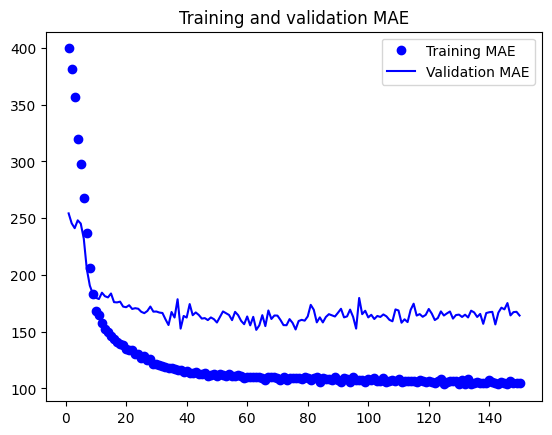

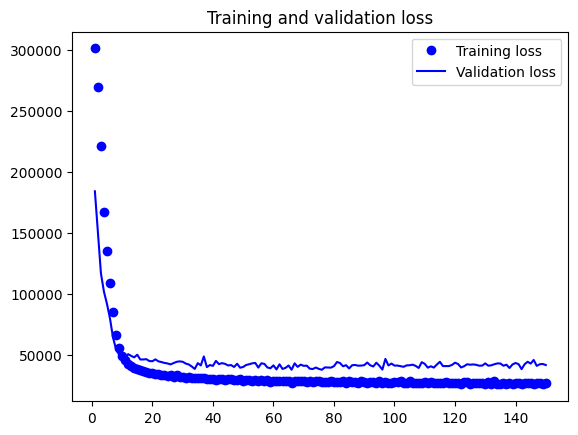

In [610]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [625]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [626]:
k = 5
num_val_samples = len(trainX) // k
all_scores = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')


Processing Fold 0
MAE: 104.9290542602539
Processing Fold 1
MAE: 108.23926544189453
Processing Fold 2
MAE: 107.94243621826172
Processing Fold 3
MAE: 106.24188995361328
Processing Fold 4
MAE: 115.6300048828125


In [627]:
for i, val in enumerate(all_scores):
    print('Fold ' + str(i) +': ' + 'MAE of', val)

print('Mean MAE of all folds: ' + str(np.mean(all_scores)))

Fold 0: MAE of 104.9290542602539
Fold 1: MAE of 108.23926544189453
Fold 2: MAE of 107.94243621826172
Fold 3: MAE of 106.24188995361328
Fold 4: MAE of 115.6300048828125
Mean MAE of all folds: 108.59653015136719


In [628]:
all_mae_histories = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [629]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]

len(average_mae_history)

150

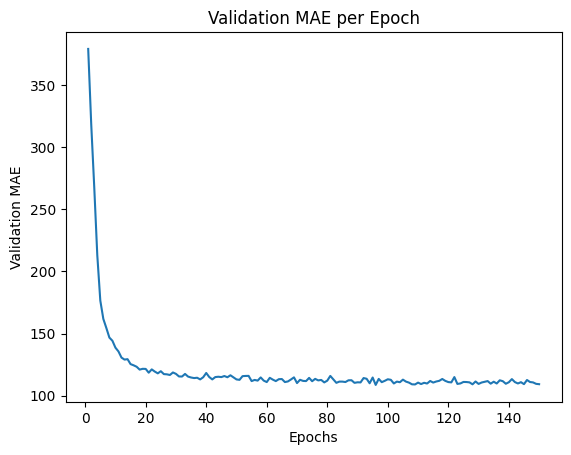

In [630]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [633]:
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
best_model = load_model(model_name_temp)

OSError: No file or directory found at ckpt_1_ANN/dnl_forcast_ANN

In [634]:
test_loss, test_mae = best_model.evaluate(testX_scaled, testY, steps=n_test_steps)
print()
print('Test MAE:', test_mae)

15/15 [==============================] - 0s 587us/step - loss: 29121.5410 - mae: 112.3406

Test MAE: 112.340576171875


In [635]:
y_pred = model.predict(testX_scaled)
y_pred[:5]

100/100 [==============================] - 0s 331us/step


array([[956.19037 ],
       [-15.93206 ],
       [-28.181282],
       [293.3748  ],
       [825.45374 ]], dtype=float32)

In [636]:
df_testY = pd.DataFrame(testY)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,1026.0,956.190369
1,0.0,-15.932060
2,0.0,-28.181282
3,265.0,293.374786
4,964.0,825.453735
...,...,...
3172,1009.0,989.803833
3173,981.0,925.768188
3174,0.0,-1.433221
3175,29.0,188.792389


In [637]:
print("Neural Network")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))
print("=================================================================\n")

print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_linreg))
print("=================================================================\n")

print("SVR")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_svr))


Neural Network
Mean Absolute Error: 110.7631924237832
Mean Squared Error: 29200.070978267722
Root Mean Squared Error: 170.8802825906714
Mean Absolute Percentage Error: 6.623092454945491e+16

Linear Regression
Mean Absolute Error: 121.09410653734832
Mean Squared Error: 30894.657464090058
Root Mean Squared Error: 175.76876134310686
Mean Absolute Percentage Error: 9.689863255563592e+16

SVR
Mean Absolute Error: 252.1271735758908
Mean Squared Error: 88746.9671952672
Root Mean Squared Error: 297.904292005448
Mean Absolute Percentage Error: 2.4056939178843744e+17


In [638]:
# make the time stamp matches the test Y
shifted_df = df.iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


In [639]:
#get the best day!
k = 22
day_long = 28
day1 = y_pred[:k]
err =[]
err.append(metrics.mean_absolute_error(testY[:k], y_pred[:k]))
for i in range(k, y_pred.shape[0], day_long):
    err.append(metrics.mean_absolute_error(testY[i:i+day_long], y_pred[i:i+day_long]))
print("min error ", min(err))
print("position of best day ", err.index(min(err)))
day_ind = 28 * (err.index(min(err))) + 15
day_ind


min error  60.14506650290319
position of best day  27


771

ValueError: x and y must have same first dimension, but have shapes (3503,) and (3177, 1)

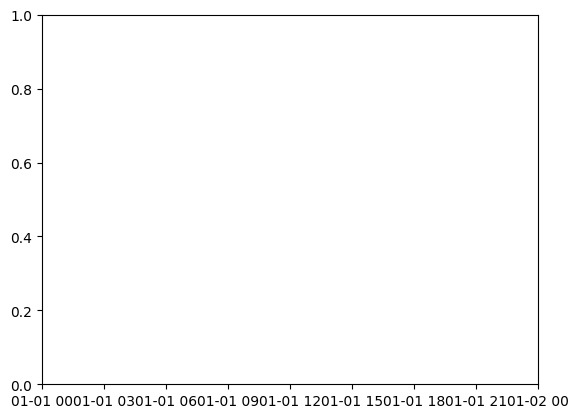

In [650]:

plt.plot(timest, testY, 'r', label='True')
plt.plot(timest, y_pred, 'b', label='ANN Forcast')
# plt.plot(timest, y_pred_svr, 'y', label='SVR Forcast')
plt.plot(timest, y_pred_linreg, 'g', label='LinearReg Forcast')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

(3503, 1)


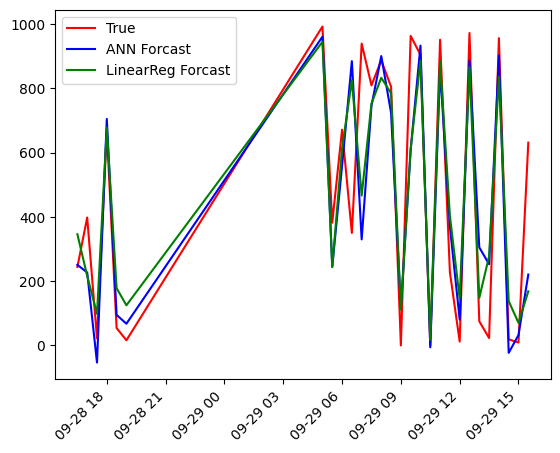

In [648]:
test_size = len(Y_test)

np.reshape(Y_test,Y_test.shape[0])
print(Y_test.shape)

plt.plot(timest[day_ind:day_ind+day_long], testY[day_ind:day_ind+day_long], 'r', label='True')
plt.plot(timest[day_ind:day_ind+day_long], y_pred[day_ind:day_ind+day_long], 'b', label='ANN Forcast')
# plt.plot(timest[day_ind:day_ind+day_long], y_pred_svr[day_ind:day_ind+day_long], 'y', label='SVR Forcast')
plt.plot(timest[day_ind:day_ind+day_long], y_pred_linreg[day_ind:day_ind+day_long], 'g', label='LinearReg Forcast')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

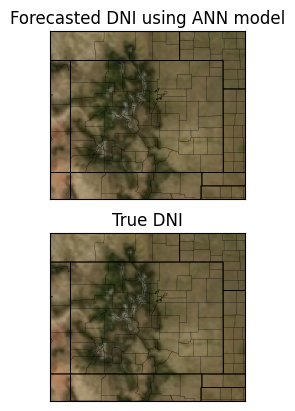

In [645]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# fig = plt.figure() 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()

x,y = m(p1_lon, p1_lat)

# m.plot(x,y, 'bo', markersize=5)

# plt.show()

In [649]:
# Moving results to another file
import pickle
y_pred_list = list(np.reshape(y_pred,y_pred.shape[0]))
y_true_list = list(np.reshape(testY, testY.shape[0]))
# print(y_pred_list)

with open("pred_nn", "wb") as fp:   #Pickling
    pickle.dump(y_pred_list, fp)

with open("true_y", "wb") as fp:   #Pickling
    pickle.dump(y_true_list, fp)

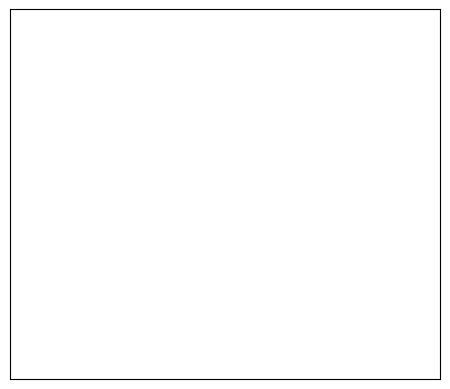

In [572]:
################# Skip this cell, it worked better in a sperete file ####################
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter

point = m.plot(x, y, 'ro', markersize=5)[0]

def init(): 
    point.set_markersize(0)
    return point,

# animation function.  This is called sequentially
def animate(i):
    s = 0.05 * i
    # point.set_linewidth(s)
    # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
    point.set_markersize(s)
    return point, 
    # m.bluemarble()
    # m.drawstates()
    # m.drawcounties()
    
    # x,y = m(p1_lon, p1_lat)
    # m.plot(x, y, 'yo', markersize=s)

anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# writer = PillowWriter(fps=30)
# anim.save("myMap.gif", writer=writer)

# plt.tight_layout()
plt.show()
# anim.save('animatedMap.mp4', writer = 'sa', fps = 30)